## Running a Classification Tree

***

### Markdown Guides

> This is a blockquote.

Some of these words *are emphasized*.

Use two asterisks for **strong emphasis**.

*   Another item in the list.

This is an [example link](http://example.com/).

$x = x + y$

[text to appear as link](#linkhandle)

Images inline
![image](https://imgbbb.com/images/2019/12/18/Screenshot-2019-12-18-at-12.55.36-PM.png)

### Project Description

This week’s assignment involves decision trees, and more specifically, classification trees. Decision trees are predictive models that allow for a data driven exploration of nonlinear relationships and interactions among many explanatory variables in predicting a response or target variable. When the response variable is categorical (two levels), the model is a called a classification tree. Explanatory variables can be either quantitative, categorical or both.  Decision trees create segmentations or subgroups in the data, by applying a series of simple rules or criteria over and over again which choose variable constellations that best predict the response (i.e. target) variable.

Run a Classification Tree.

You will need to perform a decision tree analysis to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| incomeperperson|	2010 Gross Domestic Product per capita in constant 2000 US$.|
| alcconsumption|	2008 alcohol consumption per adult (age 15+), litres|
| armedforcesrate|	Armed forces personnel (% of total labor force)|
| breastcancerper100TH|	2002 breast cancer new cases per 100,000 female|
| co2emissions|	2006 cumulative CO2 emission (metric tons)|
| femaleemployrate|	2007 female employees age 15+ (% of population)|
| employrate|	2007 total employees age 15+ (% of population)|
| HIVrate|	2009 estimated HIV Prevalence %|
| Internetuserate|	2010 Internet users (per 100 people)|
| lifeexpectancy|	2011 life expectancy at birth (years)|
| oilperperson|	2010 oil Consumption per capita (tonnes per year and person)|
| polityscore|	2009 Democracy score (Polity)|
| relectricperperson|	2008 residential electricity consumption, per person (kWh)|
| suicideper100TH|	2005 Suicide, age adjusted, per 100 000|
| urbanrate|	2008 urban population (% of total)|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import shap
# import statsmodels.api as sm
# import datetime
# from datetime import datetime, timedelta
# import scipy.stats
# import pandas_profiling
# from pandas_profiling import ProfileReport
# import graphviz

# import xgboost as xgb
# from xgboost import XGBClassifier, XGBRegressor
# from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
#sns.set_style('dark')
#sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.tree import DecisionTreeClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

#from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
from feature_engine.encoding import OrdinalEncoder

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.option_context('float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("gapminderfinal5.csv")

In [3]:
df

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,722.81,3.91,1.09,16,1425.0,67.60,0.40,28,75,1.48,-7,302.73,12,71.00,27.84,0,3,1,1,0.101449
209,8740.97,6.69,5.94,37,14.0,11.30,1.94,36,73,1.48,4,1173.18,10,32.00,71.90,2,0,3,2,0.155844
210,610.36,0.20,2.32,35,235.0,20.30,1.94,12,65,1.48,-2,130.06,6,39.00,30.64,1,2,0,0,0.101449
211,432.23,3.56,0.34,13,132.0,53.50,13.50,10,49,1.48,7,168.62,12,61.00,35.42,3,2,0,1,0.101449


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   incomeperperson       213 non-null    float64
 1   alcconsumption        213 non-null    float64
 2   armedforcesrate       213 non-null    float64
 3   breastcancerper100th  213 non-null    int64  
 4   co2emissions          213 non-null    float64
 5   femaleemployrate      213 non-null    float64
 6   hivrate               213 non-null    float64
 7   internetuserate       213 non-null    int64  
 8   lifeexpectancy        213 non-null    int64  
 9   oilperperson          213 non-null    float64
 10  polityscore           213 non-null    int64  
 11  relectricperperson    213 non-null    float64
 12  suicideper100th       213 non-null    int64  
 13  employrate            213 non-null    float64
 14  urbanrate             213 non-null    float64
 15  demoscorecat          2

In [5]:
df[['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat']] = df[['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat']].astype('category')

In [6]:
df.describe(include='all')

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.00000,213.000000,213.0,213.0,213.0,213.0,213.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,5.0,5.000000
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,2.0,0.155844
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,43.0,43.0,45.0,77.000000
mean,8740.966338,6.689484,1.443052,37.323944,5033.244131,47.549531,1.936854,35.685446,69.751174,1.481362,3.765258,1173.179390,9.685446,58.63662,56.769390,NaN,NaN,NaN,NaN,NaN
std,13466.912542,4.589345,1.498692,20.443277,24936.503422,13.364005,3.632102,26.418255,9.241981,0.987116,5.487663,1341.777091,5.955782,9.61196,23.275759,NaN,NaN,NaN,NaN,NaN
min,103.780000,0.030000,0.000000,4.000000,0.000000,11.300000,0.060000,0.000000,48.000000,0.030000,-10.000000,0.000000,0.000000,32.00000,10.400000,NaN,NaN,NaN,NaN,NaN
25%,952.830000,3.230000,0.570000,23.000000,38.000000,40.300000,0.200000,12.000000,65.000000,1.480000,1.000000,431.630000,6.000000,53.50000,37.340000,NaN,NaN,NaN,NaN,NaN
50%,3665.350000,6.690000,1.210000,35.000000,235.000000,47.550000,1.200000,36.000000,72.000000,1.480000,4.000000,1173.180000,10.000000,58.64000,56.770000,NaN,NaN,NaN,NaN,NaN
75%,8740.970000,9.500000,1.440000,44.000000,2422.000000,53.600000,1.940000,52.000000,76.000000,1.480000,8.000000,1173.180000,12.000000,63.70000,73.500000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(213, 20)

In [8]:
df.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat'], dtype='object')

## Data Preprocessing

### Feature Engineering

### Equal Width Discretization

In [9]:
df["politycat"] = df["polityscore"] #Make a copy

In [10]:
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat,politycat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449,9
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449,2
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844,4
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449,-2


In [11]:
disc = EqualWidthDiscretiser(bins=2, variables=['politycat'], return_object=True)

In [12]:
df2 = disc.fit_transform(df)

In [13]:
df2.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,demoscorecat,co2cat,incomecat,alccat,electricat,politycat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,0,1173.18,7,55.70,24.04,1,1,3,0,0.155844,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,9,636.34,8,51.40,46.72,3,2,1,3,0.101449,1
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,2,590.51,5,50.50,65.22,2,3,2,0,0.101449,1
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,4,1173.18,5,58.64,88.92,2,4,4,4,0.155844,1
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,-2,173.00,15,75.70,56.70,1,2,1,2,0.101449,0


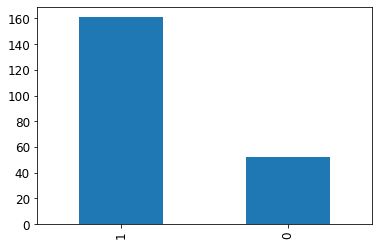

In [14]:
df2["politycat"].value_counts().plot.bar()
plt.show()

In [15]:
#df2.to_csv("gapminderfinal6.csv", index=False)

### Drop unwanted features

In [16]:
df2.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate', 'demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat', 'politycat'], dtype='object')

In [17]:
df2.drop(['demoscorecat', 'co2cat', 'incomecat', 'alccat', 'electricat','polityscore'],axis=1, inplace=True)

In [18]:
df2.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,relectricperperson,suicideper100th,employrate,urbanrate,politycat
0,8740.97,0.03,0.57,27,76.0,25.60,1.94,4,49,1.48,1173.18,7,55.70,24.04,0
1,1915.00,7.29,1.02,57,224.0,42.10,1.94,45,77,1.48,636.34,8,51.40,46.72,1
2,2231.99,0.69,2.31,24,2932.0,31.70,0.10,12,73,0.42,590.51,5,50.50,65.22,1
3,21943.34,10.17,1.44,37,5033.0,47.55,1.94,81,70,1.48,1173.18,5,58.64,88.92,1
4,1381.00,5.57,1.46,23,248.0,69.40,2.00,10,51,1.48,173.00,15,75.70,56.70,0


### Treat Missing Values

In [19]:
df2.isnull().sum()

incomeperperson         0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 0
internetuserate         0
lifeexpectancy          0
oilperperson            0
relectricperperson      0
suicideper100th         0
employrate              0
urbanrate               0
politycat               0
dtype: int64

### Treat Duplicate Values

In [20]:
df2.duplicated(keep='first').sum()

0

### Treat Data Types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   incomeperperson       213 non-null    float64 
 1   alcconsumption        213 non-null    float64 
 2   armedforcesrate       213 non-null    float64 
 3   breastcancerper100th  213 non-null    int64   
 4   co2emissions          213 non-null    float64 
 5   femaleemployrate      213 non-null    float64 
 6   hivrate               213 non-null    float64 
 7   internetuserate       213 non-null    int64   
 8   lifeexpectancy        213 non-null    int64   
 9   oilperperson          213 non-null    float64 
 10  polityscore           213 non-null    int64   
 11  relectricperperson    213 non-null    float64 
 12  suicideper100th       213 non-null    int64   
 13  employrate            213 non-null    float64 
 14  urbanrate             213 non-null    float64 
 15  demosc

In [22]:
df2["politycat"] = df2["politycat"].astype('category')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   incomeperperson       213 non-null    float64 
 1   alcconsumption        213 non-null    float64 
 2   armedforcesrate       213 non-null    float64 
 3   breastcancerper100th  213 non-null    int64   
 4   co2emissions          213 non-null    float64 
 5   femaleemployrate      213 non-null    float64 
 6   hivrate               213 non-null    float64 
 7   internetuserate       213 non-null    int64   
 8   lifeexpectancy        213 non-null    int64   
 9   oilperperson          213 non-null    float64 
 10  relectricperperson    213 non-null    float64 
 11  suicideper100th       213 non-null    int64   
 12  employrate            213 non-null    float64 
 13  urbanrate             213 non-null    float64 
 14  politycat             213 non-null    category
dtypes: cat

### Train Test Split

In [24]:
df2.shape

(213, 15)

In [25]:
X = df2.iloc[:,0:14]
y = df2.iloc[:,14]

### Train Test Split Cont'd

In [26]:
X.values, y.values

(array([[8740.97,    0.03,    0.57, ...,    7.  ,   55.7 ,   24.04],
        [1915.  ,    7.29,    1.02, ...,    8.  ,   51.4 ,   46.72],
        [2231.99,    0.69,    2.31, ...,    5.  ,   50.5 ,   65.22],
        ...,
        [ 610.36,    0.2 ,    2.32, ...,    6.  ,   39.  ,   30.64],
        [ 432.23,    3.56,    0.34, ...,   12.  ,   61.  ,   35.42],
        [ 320.77,    4.96,    1.03, ...,   14.  ,   66.8 ,   37.34]]),
 [0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 1]
 Length: 213
 Categories (2, int64): [0, 1])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 14), (43, 14), (170,), (43,))

### Feature Scaling

In [29]:
X_train

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,relectricperperson,suicideper100th,employrate,urbanrate
16,2737.67,18.85,3.71,36,1000.0,48.6,0.30,32,70,0.69,614.91,27,53.4,73.46
135,268.26,2.42,1.01,22,53.0,54.6,0.40,8,69,1.48,31.54,12,61.8,17.24
122,609.13,0.11,1.55,28,57.0,45.3,0.70,3,59,1.48,1173.18,7,46.9,41.00
22,1232.79,5.78,1.88,25,255.0,61.6,0.20,20,67,1.48,213.06,2,70.4,65.58
80,1200.65,8.70,0.88,30,69.0,41.8,1.20,30,70,1.48,1173.18,36,58.9,28.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,354.60,3.58,0.13,6,7.0,65.7,2.00,9,58,1.48,1173.18,6,71.7,56.42
192,285.22,1.92,0.34,28,32.0,48.4,3.20,5,57,1.48,66.24,6,63.9,42.00
117,4038.86,6.69,1.44,37,8.0,42.1,0.06,28,77,1.48,1173.18,22,56.9,37.86
47,4495.05,5.12,1.50,31,1287.0,43.7,0.10,16,79,1.48,528.79,11,56.0,75.66


In [30]:
minmax = MinMaxScaler()

In [31]:
X_train_scaled = minmax.fit_transform(X_train)

In [32]:
X_test_scaled = minmax.transform(X_test)

In [33]:
X_train_scaled

array([[0.02507424, 0.98430962, 0.34868421, ..., 0.75      , 0.41796875,
        0.70379464],
       [0.00156583, 0.125     , 0.09492481, ..., 0.33333333, 0.58203125,
        0.07633929],
       [0.00481086, 0.0041841 , 0.14567669, ..., 0.19444444, 0.29101562,
        0.34151786],
       ...,
       [0.03746138, 0.34832636, 0.13533835, ..., 0.61111111, 0.48632812,
        0.30647321],
       [0.04180424, 0.26621339, 0.14097744, ..., 0.30555556, 0.46875   ,
        0.72834821],
       [0.00156649, 0.49424686, 0.04887218, ..., 0.33333333, 0.62109375,
        0.30535714]])

In [34]:
X_test_scaled

array([[ 0.04992991,  0.15638075,  0.22368421,  0.18556701,  0.01697983,
         0.14722222,  0.        ,  0.41666667,  0.74285714,  0.05590062,
         0.06585296,  0.11111111,  0.2109375 ,  0.65044643],
       [ 0.05931181,  0.45920502,  0.12593985,  0.41237113,  0.00549937,
         0.33611111,  0.01374293,  0.46875   ,  0.88571429,  0.12888199,
         0.06367899,  0.27777778,  0.37109375,  0.87098214],
       [ 0.00602121,  0.02301255,  0.72744361,  0.28865979,  0.00724373,
         0.01527778,  0.0759903 ,  0.02083333,  0.6       ,  0.22515528,
         0.        ,  0.47222222,  0.10546875,  0.62723214],
       [ 0.08222476,  0.44037657,  0.13533835,  0.34020619,  0.00000299,
         0.50347222,  0.0759903 ,  0.19791667,  0.48571429,  0.22515528,
         0.14028941,  0.27777778,  0.5203125 ,  0.55982143],
       [ 0.01444542,  0.41213389,  0.08364662,  0.30927835,  0.00028125,
         0.75      ,  0.00970089,  0.20833333,  0.68571429,  0.22515528,
         0.06321621,  0.11

### Model Training

### Using Regression or Classification Models

In [35]:
treeclf = DecisionTreeClassifier()

In [36]:
treeclf.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [37]:
y_pred = treeclf.predict(X_test_scaled)

In [38]:
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

### Model Evaluation

In [39]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 5,  5],
       [ 7, 26]], dtype=int64)

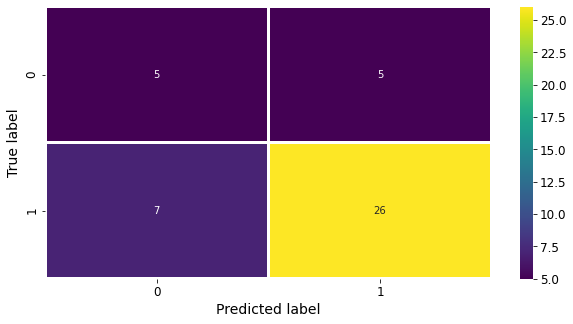

In [40]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.50      0.45        10
           1       0.84      0.79      0.81        33

    accuracy                           0.72        43
   macro avg       0.63      0.64      0.63        43
weighted avg       0.74      0.72      0.73        43



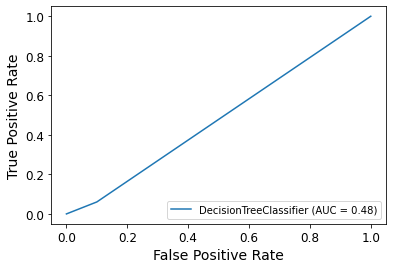

In [42]:
plot_roc_curve(treeclf,X_test,y_test)
plt.show()

### Plot Feature Importances

In [43]:
treeclf.feature_importances_

array([0.        , 0.03594909, 0.03826839, 0.23884608, 0.        ,
       0.13427122, 0.0488062 , 0.12841806, 0.0467033 , 0.01488095,
       0.09259413, 0.04359035, 0.08491429, 0.09275794])

In [44]:
feat_importances = pd.Series(treeclf.feature_importances_, index=X.columns)

In [45]:
feat_importances

incomeperperson         0.000000
alcconsumption          0.035949
armedforcesrate         0.038268
breastcancerper100th    0.238846
co2emissions            0.000000
femaleemployrate        0.134271
hivrate                 0.048806
internetuserate         0.128418
lifeexpectancy          0.046703
oilperperson            0.014881
relectricperperson      0.092594
suicideper100th         0.043590
employrate              0.084914
urbanrate               0.092758
dtype: float64

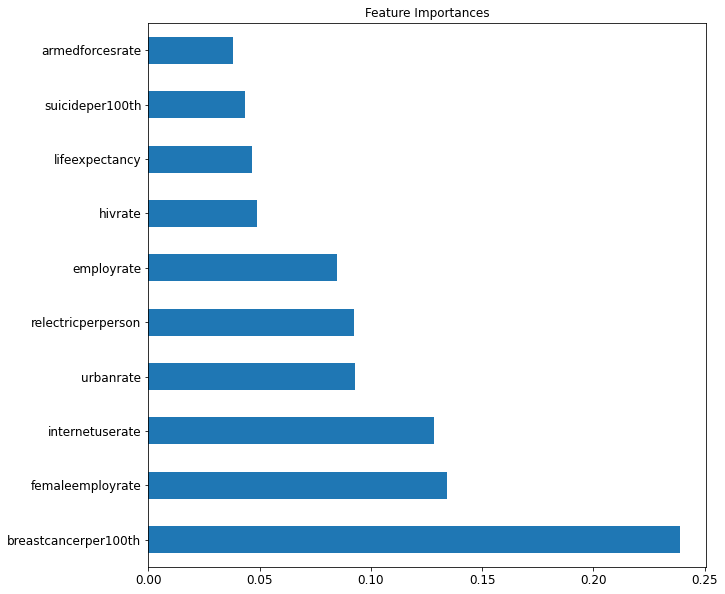

In [46]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Plot Tree

In [47]:
X.columns

Index(['incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'], dtype='object')

In [48]:
y

0      0
1      1
2      1
3      1
4      0
      ..
208    0
209    1
210    0
211    1
212    1
Name: politycat, Length: 213, dtype: category
Categories (2, int64): [0, 1]

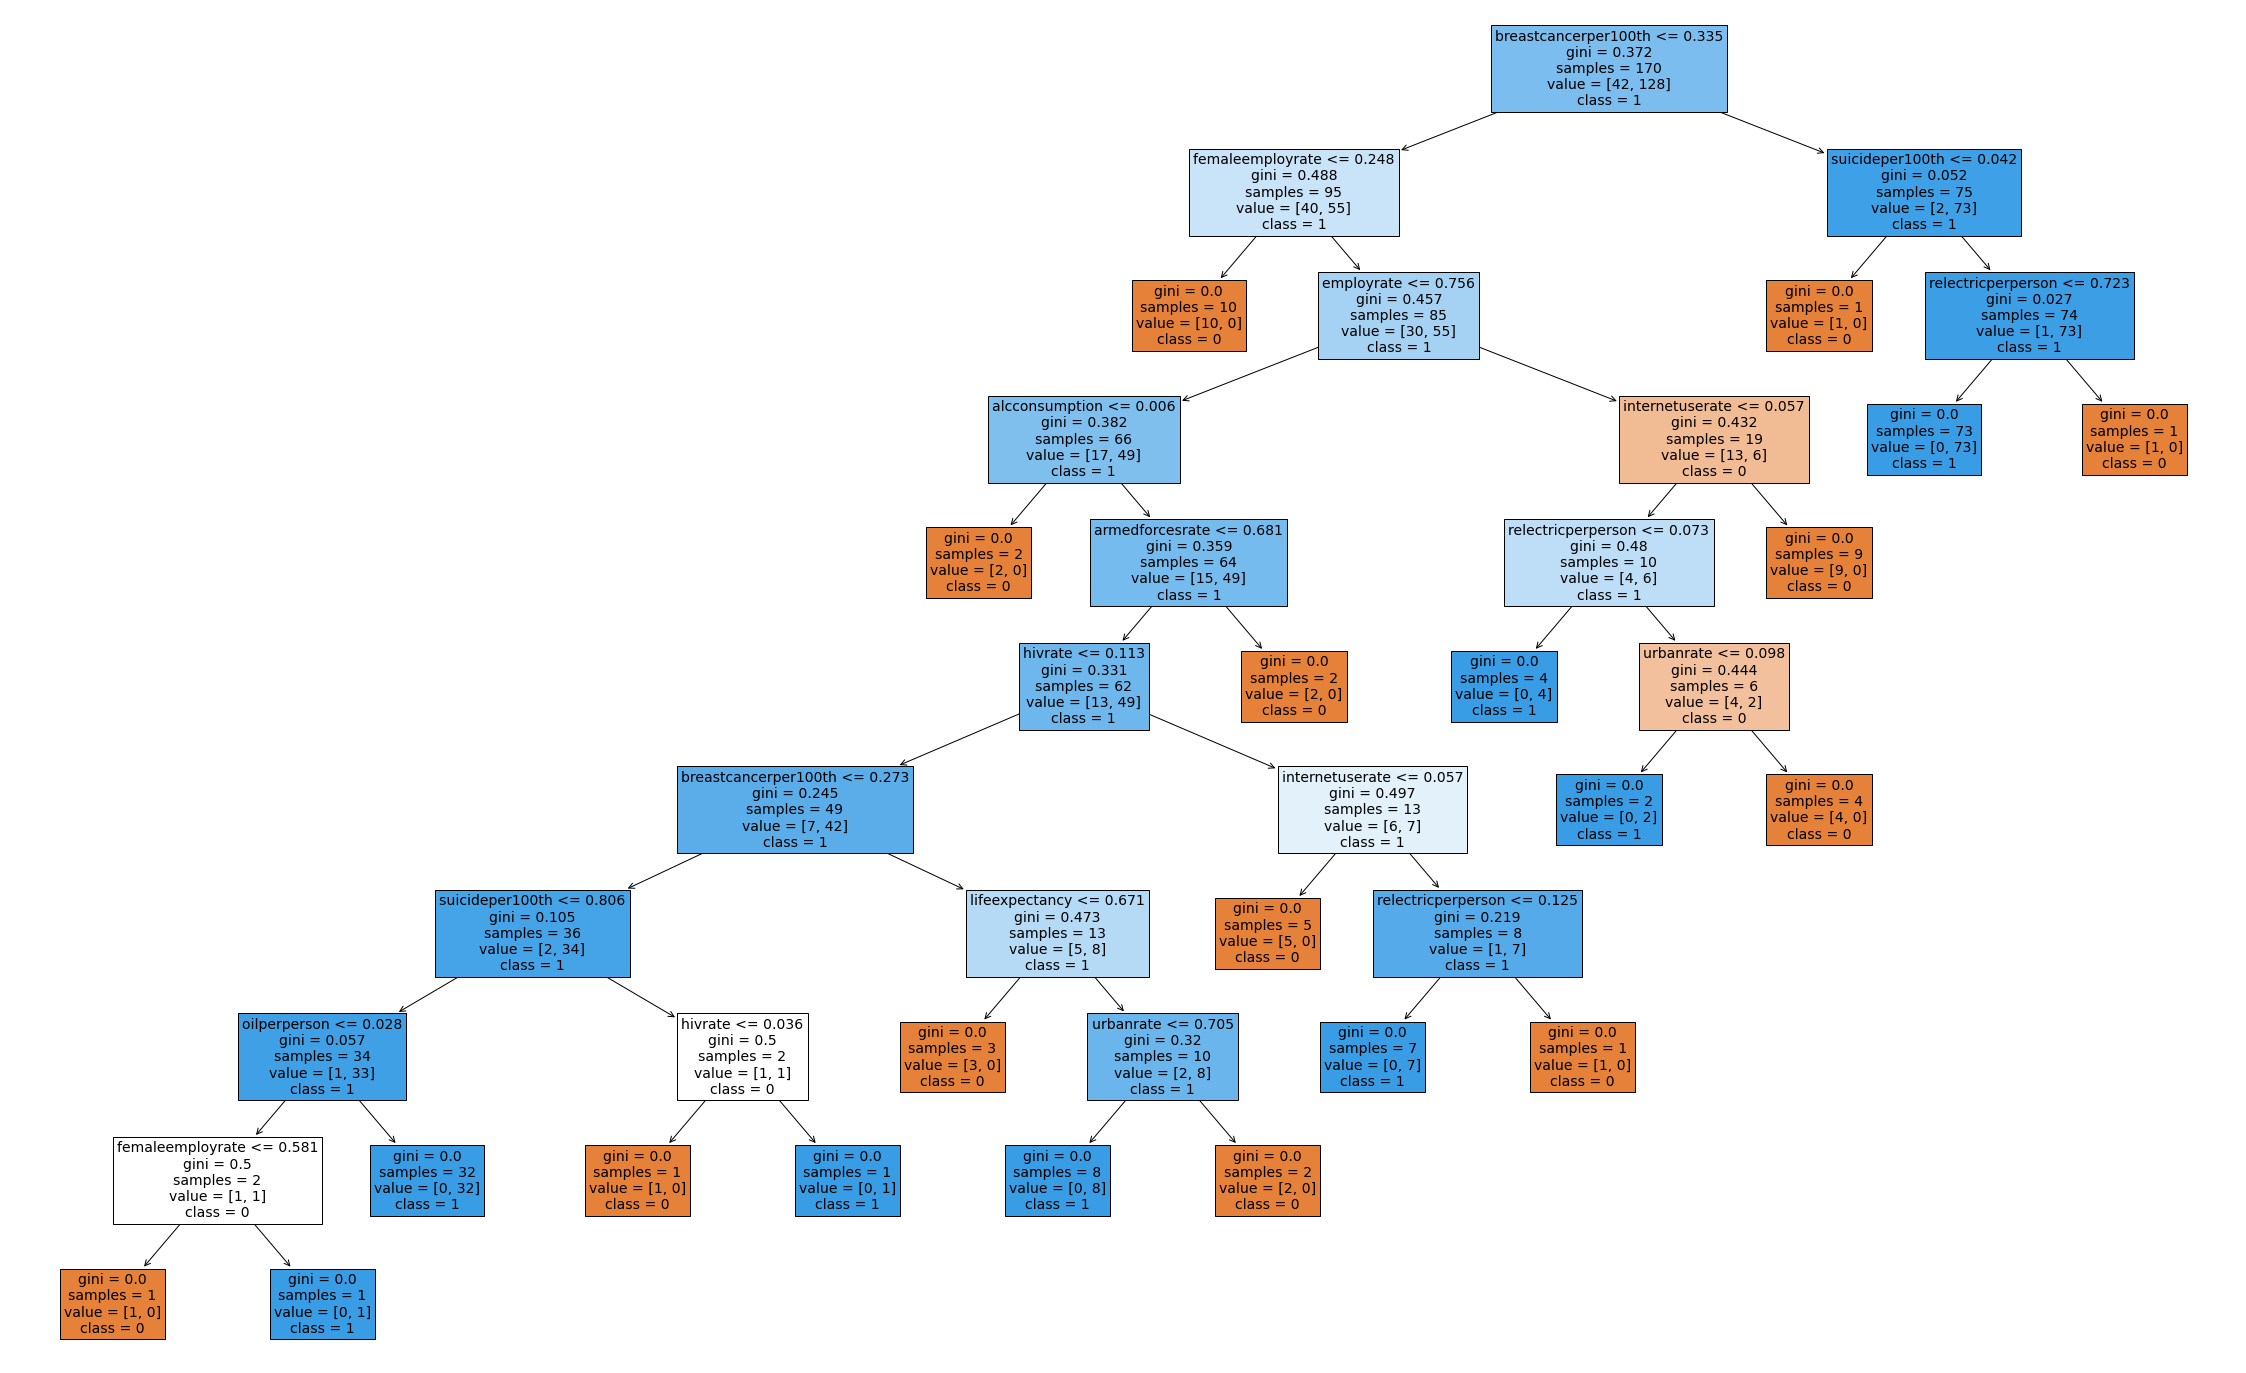

In [49]:
plt.figure(figsize=(40,25))
plot_tree(treeclf, feature_names=X.columns,class_names=['0','1'], fontsize=14, filled=True)
plt.show()

### Cross-Validation

In [50]:
cv = cross_val_score(treeclf,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [51]:
cv.mean()

0.7184939091915836

#### Python code done by Dennis Lam